In [1]:
import pandas as pd
import numpy as np

In [101]:
df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt')
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt')
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt')
df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt')
df5 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt')

In [25]:
#Convert Date and Time into a more useable DateTime format.
def df_DateTime(df):
    df['DateTime'] = pd.to_datetime(df.DATE+' '+df.TIME)
    return df

#Record what day of the week each entry is from
def df_day_of_week(df):
    df['Day']=df.DateTime.dt.day_name()
    return df

#SCP represents a specific turnstile.
#C/A represents a control area. This is a bank of turnstiles.  
#Unit represents a remote unit. Usually a whole station, or an area in a complex station.
#We can combine all three to create a unique ID for any turnstile
def df_Unit_ID(df):
    df['Unit_ID'] = df.SCP+' '+df['C/A']+' '+df.UNIT
    return df

#Rename Exits column to remove extra spaces
def rename_columns(df):
    df.rename(columns={'EXITS                                                               ':'EXITS'},inplace=True)
    return df

#Remove irregularities in reporting
def clean_desc(df):
    df = df[df.DESC == 'REGULAR']
    return df

#Calculate the entries/exits in a four hour period by finding the difference between rows
def df_four_hour(df):
    df['Four Hour Entries'] = df.groupby('Unit_ID').ENTRIES.diff()
    df['Four Hour Exits'] = df.groupby('Unit_ID').EXITS.diff()
    return df

#Replace NaN, negative values, and impossibly large values by the average of the turnstile
def df_clean_four_hour(df):
    df['Four Hour Entries'].fillna(-1, inplace=True)
    df['Four Hour Exits'].fillna(-1, inplace=True)
    df['Four Hour Entries'] = df.groupby(['TIME','C/A'])['Four Hour Entries'].transform(
        lambda x: np.where((x<0)|(x>20000),x.mask((x<0)|(x>20000)).mean(),x))
    df['Four Hour Exits'] = df.groupby(['TIME','C/A'])['Four Hour Exits'].transform(
        lambda x: np.where((x<0)|(x>20000),x.mask((x<0)|(x>20000)).mean(),x))
    return df

#Create a column for the total amount of traffic through a turnstile
def df_total_flow(df):
    df['Total Flow'] = df['Four Hour Entries']+df['Four Hour Exits']
    return df

IndentationError: unexpected indent (<ipython-input-25-511256c6ec88>, line 23)

In [104]:
df1 = df_DateTime(df1)
df1 = df_day_of_week(df1)
df1 = df_Unit_ID(df1)
df1 = rename_columns(df1)
df1 = df_four_hour(df1)
df1 = df_clean_four_hour(df1)
df1 = clean_desc(df1)

df2 = df_DateTime(df2)
df2 = df_day_of_week(df2)
df2 = df_Unit_ID(df2)
df2 = rename_columns(df2)
df2 = df_four_hour(df2)
df2 = df_clean_four_hour(df2)
df2 = clean_desc(df2)

df3 = df_DateTime(df3)
df3 = df_day_of_week(df3)
df3 = df_Unit_ID(df3)
df3 = rename_columns(df3)
df3 = df_four_hour(df3)
df3 = df_clean_four_hour(df3)
df3 = clean_desc(df3)

df4 = df_DateTime(df4)
df4 = df_day_of_week(df4)
df4 = df_Unit_ID(df4)
df4 = rename_columns(df4)
df4 = df_four_hour(df4)
df4 = df_clean_four_hour(df4)
df4 = clean_desc(df4)

df5 = df_DateTime(df5)
df5 = df_day_of_week(df5)
df5 = df_Unit_ID(df5)
df5 = rename_columns(df5)
df5 = df_four_hour(df5)
df5 = df_clean_four_hour(df5)
df5 = clean_desc(df5)

In [106]:
df1 = df_total_flow(df1)
df2 = df_total_flow(df2)
df3 = df_total_flow(df3)
df4 = df_total_flow(df4)
df5 = df_total_flow(df5)

In [26]:
#Find daily sum for each STATION for each day of the week
df1_daily = df1.groupby(['STATION','DATE'])['Four Hour Entries','Four Hour Exits','Total Flow'].sum()
df1_daily.head(20)

<ipython-input-26-9aec250956d1>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1_daily = df1.groupby(['STATION','DATE'])['Day','Four Hour Entries','Four Hour Exits','Total Flow'].sum()


Four Hour Entries  Four Hour Exits  Total Flow
STATION       DATE                                                      
1 AV          04/27/2019        6611.333333      9176.666667     15788.0
              04/28/2019        5205.000000      7239.000000     12444.0
              04/29/2019       17134.000000     19320.000000     36454.0
              04/30/2019       18588.000000     20421.000000     39009.0
              05/01/2019       19221.000000     21124.000000     40345.0
              05/02/2019       19406.000000     21335.000000     40741.0
              05/03/2019       19732.000000     22665.000000     42397.0
103 ST        04/27/2019       19351.000000     13987.000000     33338.0
              04/28/2019       15913.000000     12349.000000     28262.0
              04/29/2019       30243.000000     21166.000000     51409.0
              04/30/2019       32303.000000     21440.000000     53743.0
              05/01/2019       32706.000000     22290.000000     54996.0
              05/02/2019       32849.000000     22354.000000     55203.0
              05/03/2019       32740.000000     21646.000000     54386.0
103 ST-CORONA 04/27/2019       14378.000000     11945.500000     26323.5
              04/28/2019       11415.000000     10283.000000     21698.0
              04/29/2019       19903.000000     12769.000000     32672.0
              04/30/2019       19854.000000     14780.000000     34634.0
              05/01/2019       20265.000000     13799.000000     34064.0
              05/02/2019       20693.000000     14936.000000     35629.0

In [67]:
df1_daily.sort_values(by=['Total Flow'],ascending=False).head(60)

Four Hour Entries  Four Hour Exits     Total Flow
STATION         DATE                                                         
34 ST-PENN STA  05/02/2019      177841.476190    160361.410714  338202.886905
                05/01/2019      177733.476190    159379.410714  337112.886905
                05/03/2019      169801.476190    158841.410714  328642.886905
                04/30/2019      174815.476190    153589.410714  328404.886905
                04/29/2019      169283.913690    146943.098214  316227.011905
GRD CNTRL-42 ST 05/01/2019      165304.071340    141747.924143  307051.995483
                05/02/2019      163527.355124    142631.302521  306158.657645
                04/30/2019      162523.355124    139958.302521  302481.657645
                05/03/2019      156925.355124    136269.949580  293195.304704
                04/29/2019      150529.258633    132881.184874  283410.443507
34 ST-HERALD SQ 05/03/2019      125888.987302    117832.000000  243720.987302
                05/02/2019      124792.653968    118410.000000  243202.653968
                05/01/2019      124479.987302    116378.000000  240857.987302
                04/30/2019      121956.987302    112160.000000  234116.987302
                04/29/2019      113923.765079    106299.000000  220222.765079
14 ST-UNION SQ  05/02/2019      116460.000000    101153.000000  217613.000000
                05/03/2019      109138.000000    101029.000000  210167.000000
TIMES SQ-42 ST  05/01/2019      108617.680272     97424.000000  206041.680272
14 ST-UNION SQ  04/30/2019      105320.000000     99042.000000  204362.000000
TIMES SQ-42 ST  05/02/2019      106554.680272     97725.000000  204279.680272
                05/03/2019      106188.680272     97400.000000  203588.680272
14 ST-UNION SQ  05/01/2019      102808.000000    100222.000000  203030.000000
23 ST           05/01/2019      119121.000000     81053.000000  200174.000000
FULTON ST       05/02/2019      107693.000000     89805.000000  197498.000000
                05/01/2019      107041.000000     89351.000000  196392.000000
23 ST           05/02/2019      115025.000000     81153.000000  196178.000000
TIMES SQ-42 ST  04/30/2019       99265.680272     95438.000000  194703.680272
23 ST           04/30/2019      114729.000000     79820.000000  194549.000000
                04/29/2019      108906.700000     85045.000000  193951.700000
14 ST-UNION SQ  04/29/2019       98367.000000     93882.000000  192249.000000
23 ST           05/03/2019      112981.000000     76326.000000  189307.000000
34 ST-PENN STA  04/27/2019       93953.886905     94933.214286  188887.101190
42 ST-PORT AUTH 05/03/2019      102202.380952     85064.568783  187266.949735
FULTON ST       05/03/2019      102931.000000     84287.000000  187218.000000
                04/30/2019      100822.000000     84903.000000  185725.000000
42 ST-PORT AUTH 05/01/2019      102406.380952     83130.124339  185536.505291
                05/02/2019      102638.714286     82693.235450  185331.949735
TIMES SQ-42 ST  04/29/2019       95418.680272     87906.000000  183324.680272
FULTON ST       04/29/2019       98773.000000     83385.000000  182158.000000
42 ST-PORT AUTH 04/30/2019       99421.047619     79639.124339  179060.171958
86 ST           05/01/2019       90840.082251     85675.381914  176515.464165
                05/03/2019       90156.264069     85411.179894  175567.443963
42 ST-PORT AUTH 04/29/2019       98399.047619     76221.235450  174620.283069
86 ST           05/02/2019       90350.264069     83588.624339  173938.888408
                04/30/2019       90173.478146     82065.748483  172239.226629
34 ST-PENN STA  04/28/2019       90368.476190     79483.410714  169851.886905
86 ST           04/29/2019       82854.264069     76346.291005  159200.555075
CANAL ST        04/30/2019       81614.607143     68150.000000  149764.607143
125 ST          05/02/2019       83020.334737     66352.000000  149372.334737
                05/03/2019       82005.968926     

In [31]:
 %matplotlib inline
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

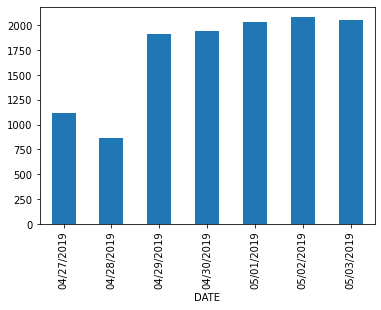

In [113]:
test1 = df1.loc[df1['Unit_ID']=='02-00-00 A002 R051'].groupby('DATE')['Total Flow'].sum()
test1.plot(x='date', y='counts',kind="bar")
plt.show

In [63]:
test2 = df1.groupby(['DATE','STATION','C/A','UNIT'])['Total Flow'].sum()
test2.sort_values(ascending=False).head(20)

DATE        STATION          C/A    UNIT
05/01/2019  PATH NEW WTC     PTH22  R540    125234.000000
05/02/2019  PATH NEW WTC     PTH22  R540    124383.000000
04/30/2019  PATH NEW WTC     PTH22  R540    119375.000000
04/29/2019  PATH NEW WTC     PTH22  R540    115043.000000
05/03/2019  PATH NEW WTC     PTH22  R540    109095.000000
05/01/2019  GRD CNTRL-42 ST  R238   R046     98129.302521
05/02/2019  GRD CNTRL-42 ST  R238   R046     96354.302521
04/30/2019  GRD CNTRL-42 ST  R238   R046     95970.302521
04/29/2019  GRD CNTRL-42 ST  R238   R046     90481.184874
05/01/2019  34 ST-PENN STA   R138   R293     80707.886905
05/02/2019  FLUSHING-MAIN    R533   R055     80398.000000
            34 ST-PENN STA   R138   R293     79856.886905
05/01/2019  FLUSHING-MAIN    R533   R055     79435.000000
04/30/2019  FLUSHING-MAIN    R533   R055     79029.000000
05/03/2019  FLUSHING-MAIN    R533   R055     78756.000000
04/30/2019  34 ST-PENN STA   R138   R293     78640.886905
05/03/2019  34 ST-PENN STA   R1

In [62]:
test3 = df1.groupby(['DATE','STATION'])['Total Flow'].sum()
test3.sort_values(ascending=False).head(20)

DATE        STATION        
05/02/2019  34 ST-PENN STA     338202.886905
05/01/2019  34 ST-PENN STA     337112.886905
05/03/2019  34 ST-PENN STA     328642.886905
04/30/2019  34 ST-PENN STA     328404.886905
04/29/2019  34 ST-PENN STA     316227.011905
05/01/2019  GRD CNTRL-42 ST    307051.995483
05/02/2019  GRD CNTRL-42 ST    306158.657645
04/30/2019  GRD CNTRL-42 ST    302481.657645
05/03/2019  GRD CNTRL-42 ST    293195.304704
04/29/2019  GRD CNTRL-42 ST    283410.443507
05/03/2019  34 ST-HERALD SQ    243720.987302
05/02/2019  34 ST-HERALD SQ    243202.653968
05/01/2019  34 ST-HERALD SQ    240857.987302
04/30/2019  34 ST-HERALD SQ    234116.987302
04/29/2019  34 ST-HERALD SQ    220222.765079
05/02/2019  14 ST-UNION SQ     217613.000000
05/03/2019  14 ST-UNION SQ     210167.000000
05/01/2019  TIMES SQ-42 ST     206041.680272
04/30/2019  14 ST-UNION SQ     204362.000000
05/02/2019  TIMES SQ-42 ST     204279.680272
Name: Total Flow, dtype: float64

In [91]:
wtc_dts = df1.loc[df1['STATION']=='PATH NEW WTC'].groupby('Day')['Total Flow'].sum()

<function matplotlib.pyplot.show(*args, **kw)>

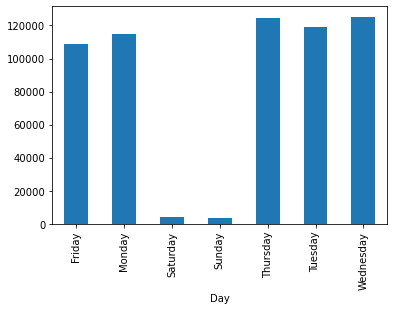

In [99]:
wtc_dts.plot(x='date',y='flow through',kind='bar')
plt.show

In [89]:
wtc_dts2 = df2.loc[df2['STATION']=='PATH NEW WTC'].groupby('Day')['Total Flow'].sum()
wtc_dts2

Day
Friday       108148.0
Monday       116461.0
Saturday       4022.0
Sunday         2509.0
Thursday     120193.0
Tuesday      120202.0
Wednesday    122898.0
Name: Total Flow, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

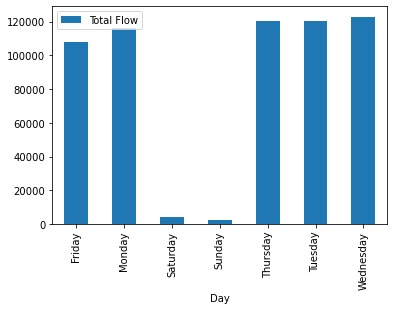

In [122]:
wtc_dts2.plot(x='Day',y='Total Flow',kind='bar')
plt.show

In [97]:
import seaborn as sns

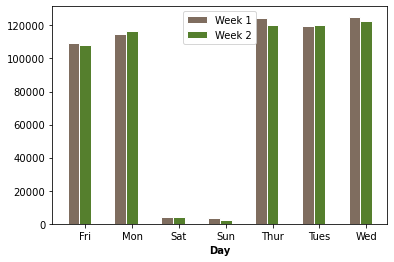

In [100]:
barWidth = 0.25
 
# set height of bar
bars1 = wtc_dts
bars2 = wtc_dts2

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Week 1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Week 2')
 
# Add xticks on the middle of the group bars
plt.xlabel('Day', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Fri', 'Mon', 'Sat', 'Sun', 'Thur','Tues','Wed'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [93]:
wtc_total = df.loc[df['STATION']=='PATH NEW WTC'].groupby('Day')['Total Flow'].sum()
wtc_total

In [123]:
#Find the daily time series for each of the five weeks for World Trade Center station
wtc_dts1 = df1.loc[df1['STATION']=='PATH NEW WTC'].groupby('Day')['Total Flow'].sum()
wtc_dts2 = df2.loc[df2['STATION']=='PATH NEW WTC'].groupby('Day')['Total Flow'].sum()
wtc_dts3 = df3.loc[df3['STATION']=='PATH NEW WTC'].groupby('Day')['Total Flow'].sum()
wtc_dts4 = df4.loc[df4['STATION']=='PATH NEW WTC'].groupby('Day')['Total Flow'].sum()
wtc_dts5 = df5.loc[df5['STATION']=='PATH NEW WTC'].groupby('Day')['Total Flow'].sum()

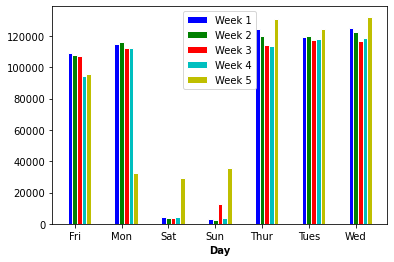

In [124]:
barWidth = 0.1
 
# set height of bar
bars1 = wtc_dts1
bars2 = wtc_dts2
bars3 = wtc_dts3
bars4 = wtc_dts4
bars5 = wtc_dts5


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Week 1')
plt.bar(r2, bars2, color='g', width=barWidth, edgecolor='white', label='Week 2')
plt.bar(r3, bars3, color='r', width=barWidth, edgecolor='white', label='Week 3')
plt.bar(r4, bars4, color='c', width=barWidth, edgecolor='white', label='Week 4')
plt.bar(r5, bars5, color='y', width=barWidth, edgecolor='white', label='Week 5')

 
# Add xticks on the middle of the group bars
plt.xlabel('Day', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Fri', 'Mon', 'Sat', 'Sun', 'Thur','Tues','Wed'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

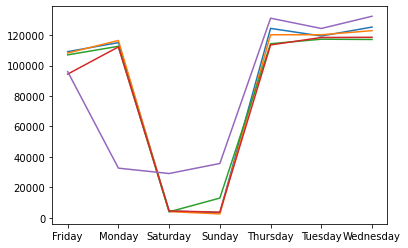

In [125]:
plt.plot(wtc_dts1)
plt.plot(wtc_dts2)
plt.plot(wtc_dts3)
plt.plot(wtc_dts4)
plt.plot(wtc_dts5)

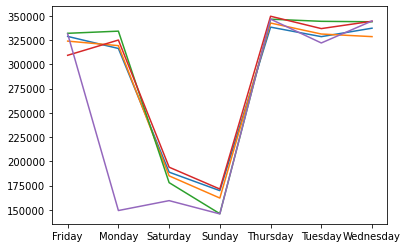

In [126]:
#Find the daily time series for each of the five weeks for Penn station
penn_dts1 = df1.loc[df1['STATION']=='34 ST-PENN STA'].groupby('Day')['Total Flow'].sum()
penn_dts2 = df2.loc[df2['STATION']=='34 ST-PENN STA'].groupby('Day')['Total Flow'].sum()
penn_dts3 = df3.loc[df3['STATION']=='34 ST-PENN STA'].groupby('Day')['Total Flow'].sum()
penn_dts4 = df4.loc[df4['STATION']=='34 ST-PENN STA'].groupby('Day')['Total Flow'].sum()
penn_dts5 = df5.loc[df5['STATION']=='34 ST-PENN STA'].groupby('Day')['Total Flow'].sum()

#Plot them
plt.plot(penn_dts1)
plt.plot(penn_dts2)
plt.plot(penn_dts3)
plt.plot(penn_dts4)
plt.plot(penn_dts5)

In [128]:
sat = df1.loc[df1['Day']=='Saturday'].groupby('STATION')['Total Flow'].sum()
sat.sort_values(ascending=False).head(10)

STATION
34 ST-PENN STA     188887.101190
34 ST-HERALD SQ    147909.820635
14 ST-UNION SQ     139801.852941
TIMES SQ-42 ST     134782.180272
42 ST-PORT AUTH    129456.671958
GRD CNTRL-42 ST    126891.196346
23 ST              116431.941822
86 ST              105252.277297
125 ST              99134.341148
CANAL ST            95042.435702
Name: Total Flow, dtype: float64

In [129]:
sun = df1.loc[df1['Day']=='Sunday'].groupby('STATION')['Total Flow'].sum()
sun.sort_values(ascending=False).head(10)

STATION
34 ST-PENN STA     169851.886905
34 ST-HERALD SQ    118355.987302
TIMES SQ-42 ST     115060.680272
42 ST-PORT AUTH    112368.171958
14 ST-UNION SQ     111143.000000
GRD CNTRL-42 ST     94700.302521
86 ST               87344.555075
23 ST               87102.800000
125 ST              85829.007814
59 ST COLUMBUS      71558.000000
Name: Total Flow, dtype: float64

In [ ]:
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt')
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt')
df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt')
df5 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt')